# Optional Lab: Cost Function for Logistic Regression

## Goals
In this lab, you will:
- examine the implementation and utilize the cost function for logistic regression.

In [81]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from work.lab_utils_common import plot_data, sigmoid, dlc
plt.style.use('./deeplearning.mplstyle')

## Dataset 

In [7]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

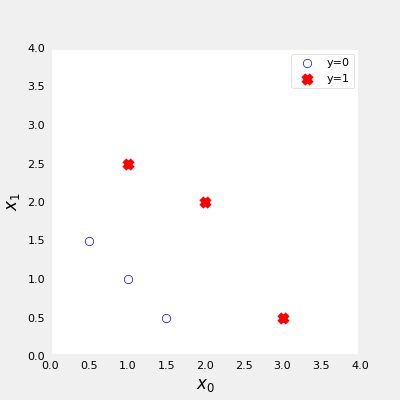

In [51]:
fix, ax = plt.subplots(1, 1, figsize=(4,4))

x0 = [tup[0] for tup in X_train[0:3]]
x1= [tup[1] for tup in X_train[0:3]]
# print(x0)
# print(x1)
plt.scatter(x0, x1, c='w', marker='o', edgecolors='b', label="y=0")

x0 = [tup[0] for tup in X_train[3:]]
x1= [tup[1] for tup in X_train[3:]]
plt.scatter(x0, x1, c='r', marker='x',  label="y=1")

plt.axis([0.,4.,0.,4.])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()
plt.show()

## Cost function

In [59]:
def sigmoid_diy(z):
    return 1.0/(1+ np.exp(-z))

In [60]:
def f_wb(x, w, b):
    z = np.dot(w,x) + b
    return sigmoid_diy(z)

In [67]:
def loss(x, y, w, b):
    y_pred = f_wb(x,w,b)
    return -y * np.log(y_pred) - (1 - y)* np.log(1- y_pred)

In [68]:
def compute_cost(X, y, w, b):
    m = len(X)
    cost = 0
    for i in range(m):
        cost += loss(X[i], y[i], w, b)
    return cost/m

In [71]:
# w_init = np.zeros_like(X_train[0])
# b_init = 0
w_tmp = np.array([1,1])
b_tmp = -3
# print(X_train)
compute_cost(X_train, y_train, w_tmp, b_tmp)

0.36686678640551745

**Expected output**: 0.3668667864055175

## Example

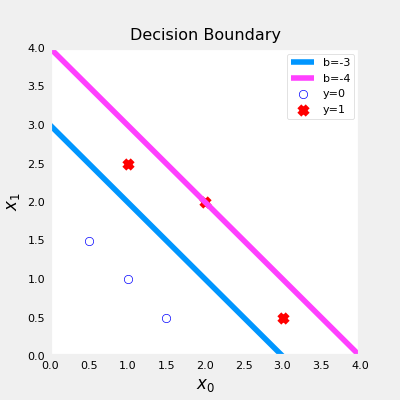

In [85]:
fix, ax = plt.subplots(1, 1, figsize=(4,4))
# b = -3, w = np.array([1,1])
# decision boundary is x0 + x1 -3 = 0  -> x1= 3-x0
x0 = np.arange(0,6,1)
ax.plot(x0, 3-x0, label="b=-3")

# b = -4, w = np.array([1,1])
# decision boundary is x0 + x1 -4 = 0  -> x1= 4-x0
ax.plot(x0, 4-x0, c="#FF40FF", label="b=-4")


x0 = [tup[0] for tup in X_train[0:3]]
x1= [tup[1] for tup in X_train[0:3]]
# print(x0)
# print(x1)
plt.scatter(x0, x1, c='w', marker='o', edgecolors='b', label="y=0")

x0 = [tup[0] for tup in X_train[3:]]
x1= [tup[1] for tup in X_train[3:]]
plt.scatter(x0, x1, c='r', marker='x',  label="y=1")

plt.axis([0.,4.,0.,4.])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()
plt.title("Decision Boundary")
plt.show()

In [86]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost(X_train, y_train, w_array2, b_2))


Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


**Expected output**

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`